In [1]:
!conda install matplotlib

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::seaborn==0.11.0=py_0
  - defaults/linux-64::anaconda==2020.11=py38_0
  - defaults/linux-64::bokeh==2.2.3=py38_0
  - defaults/noarch::imageio==2.9.0=py_0
  - defaults/linux-64::anaconda-navigator==1.10.0=py38_0
  - defaults/linux-64::matplotlib==3.3.2=0
  - defaults/linux-64::matplotlib-base==3.3.2=py38h817c723_0
  - defaults/noarch::flask==1.1.2=py_0
  - defaults/linux-64::scikit-image==0.17.2=py38hdf5156a_0
  - defaults/linux-64::gevent==20.9.0=py38h7b6447c_0
  - defaults/noarch::dask==2.30.0=py_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
dfOvertime = pd.read_csv("dpr_unsol_OpenOvertime.csv")
dependent = json.load(open('../datasets/nq_open_test.json'))
dfOvertime['timely'] = dfOvertime['Question'].apply(lambda x: dependent[x])  

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
dfOvertime['stdev'] = dfOvertime.filter(regex="Bleu Score").std(axis = 1)

In [6]:
#dfOvertime = dfOvertime.dropna()
dfOvertime = dfOvertime.mask(dfOvertime.eq('None')).dropna()
dfOvertime[['stdev']]

,stdev
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1198,0.0
1199,0.0
1200,0.0
1201,0.0


In [7]:
pos = dfOvertime[dfOvertime["timely"]]
len(pos)/len(dfOvertime)

0.3183707398171239

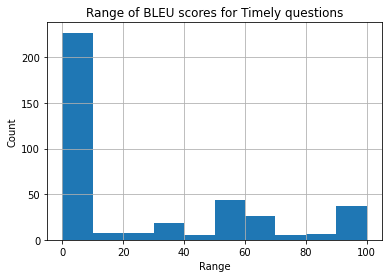

In [8]:
pos["max - min"].hist()
plt.xlabel('Range')
plt.ylabel('Count')
plt.title('Range of BLEU scores for Timely questions')
;
plt.savefig('TimelyRange.png')

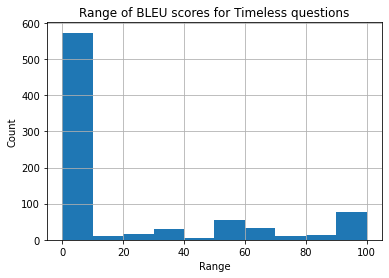

In [11]:
neg["max - min"].hist()
plt.xlabel('Range')
plt.ylabel('Count')
plt.title('Range of BLEU scores for Timeless questions')
plt.savefig('TimelessRange.png')

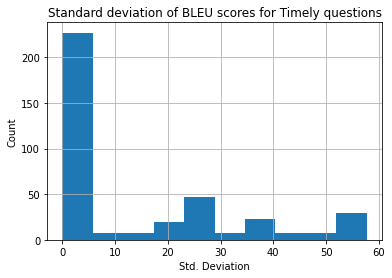

In [12]:
pos["stdev"].hist()
plt.xlabel('Std. Deviation')
plt.ylabel('Count')
plt.title('Standard deviation of BLEU scores for Timely questions')
plt.savefig('TimelyStdev.png')

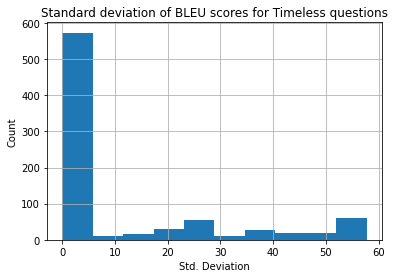

In [13]:
neg["stdev"].hist()
plt.xlabel('Std. Deviation')
plt.ylabel('Count')
plt.title('Standard deviation of BLEU scores for Timeless questions')
plt.savefig('TimelessStdev.png')

In [14]:
truePos = len(pos[pos["stdev"] >= 70.0])
falseNeg = len(pos[pos["stdev"] < 70.0])
print(truePos, falseNeg)

0 383


In [15]:
truePos = len(pos[pos["max - min"] >= 70.0])
falseNeg = len(pos[pos["max - min"] < 70.0])
print(truePos, falseNeg)


48 335


In [10]:
neg = dfOvertime[dfOvertime["timely"] == False]
neg

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,2016 Predicted,2016 Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min,timely,stdev
2,2,what is the shannara chronicles season 2 based on,['The Sword of Shannara Trilogy'],The Shannara Chronicles,"The Elfstones of Shannara, The ""Heritage of Shannara, The ""Heritage of Shannara, The Original Shannara Trilogy, the Heritage of Shannara, Tolkien For Dummies, The Voyage of the Jerle Shannara, The Shannara family, Drenai Series, Genesis of Shannara Series","{'The Elfstones of Shannara': 'Shannara', 'The ""Heritage of Shannara': 'The Elf Queen of Shannara', 'The Original Shannara Trilogy': 'The Wishsong of Shannara', 'the Heritage of Shannara': 'The Voyage of the Jerle Shannara', 'Tolkien For Dummies': 'The Sword of Shannara', 'The Voyage of the Jerle Shannara': 'Shannara', 'The Shannara family': 'Shannara', 'Drenai Series': 'The First Chronicles of Druss the Legend', 'Genesis of Shannara Series': 'The Sword of Shannara'}",100.0,The Elfstones of Shannara,Shannara,100.0,"The ""Heritage of Shannara",The Elf Queen of Shannara,100.0,The Elfstones,The Shannara Chronicles,0.0,False,0.0
5,5,types of skiing in the winter olympics 2018,['Downhill'],Alpine skiing at the 2018 Winter Olympics,"Alpine skiing, slalom (super-G), and downhill (DH), Paralympic Nordic skiing, cross-country, Ski racing, Alpine skiing, Speed skiing, aerials, and sometimes ""new-school"" events such as halfpipe, big air, slopestyle, and skiercross, jumps, alpine disciplines","{'Alpine skiing': 'Alpine skiing', 'slalom (super-G), and downhill (DH)': 'Alpine skiing', 'Paralympic Nordic skiing': 'Paralympic Nordic skiing', 'cross-country': 'Skiathlon', 'Ski racing': 'Ski racing', 'Speed skiing': 'Speed skiing', 'aerials, and sometimes ""new-school"" events such as halfpipe, big air, slopestyle, and skiercross': 'Alpine skiing', 'jumps': 'Downhill', 'alpine disciplines': 'Downhill'}",100.0,Alpine skiing,Alpine skiing at the Winter Olympics,100.0,Alpine skiing,Alpine skiing,100.0,Nordic skiing,Nordic skiing at the 2018 Winter Olympics,0.0,False,0.0
7,7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,"1982, December 8, 1985, 1983, 12th South Asian Association for Regional Cooperation (SAARC) summit at Islamabad, capital of Pakistan on 6 January 2004, 1956, September 8, 1954, 1 April 1980, 1999, mid-1970s, August 8, 1967","{'1982': 'South Asia Co-operative Environment Programme', 'December 8, 1985': 'South Asian Association for Regional Cooperation', '1983': 'South Asian Games', '12th South Asian Association for Regional Cooperation (SAARC) summit at Islamabad, capital of Pakistan on 6 January 2004': 'South Asia Free Trade Agreement', '1956': 'Association of Southeast Asian Nations', 'September 8, 1954': 'Southeast Asia Treaty Organization', '1 April 1980': 'Southern African Development Coordination Conference', '1999': 'SAARC Consortium on Open and Distance Learning', 'mid-1970s': 'Southern African Development Community', 'August 8, 1967': 'Association of Southeast Asian Nations'}",100.0,1980,Southern African Development Community,100.0,1985,South Asian Association for Regional Cooperation,100.0,1985,South Asian Association for Regional Cooperation,0.0,False,0.0
8,8,new york heart association functional classification of angina,['II'],New York Heart Association Functional Classification,"high risk acute coronary syndromes, Angina pectoris, stable or unstable angina, Cardiovascular effects, Prinzmetal, Neural effects, Angiotensin II is the most important Gq stimulator of the heart during hypertrophy, Angina is due to a temporary reduction in the flow of blood to part of the heart muscle and does not damage the heart itself, Prinzmetal's angina, also known as variant angina or angina inversa, is a syndrome typically consisting of ang

<AxesSubplot:>

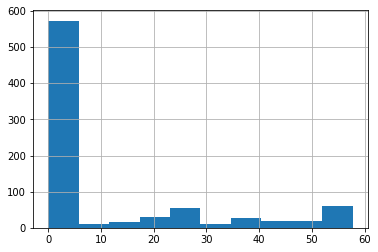

In [16]:
neg["stdev"].hist()

In [17]:
cutoff = 35.00

truePos = len(pos[pos["stdev"] >= cutoff])
falseNeg = len(pos[pos["stdev"] < cutoff])
print(truePos, falseNeg)

falsePos = len(neg[neg["stdev"] >= cutoff])
trueNeg = len(neg[neg["stdev"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

62 321
699 121
Recall:  0.1618798955613577
Precision: 0.33879781420765026
F1 Score: 0.21908127208480568


In [18]:
cutoff = 70.00

truePos = len(pos[pos["max - min"] >= cutoff])
falseNeg = len(pos[pos["max - min"] < cutoff])
print(truePos, falseNeg)

falsePos = len(neg[neg["max - min"] >= cutoff])
trueNeg = len(neg[neg["max - min"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

48 335
721 99
Recall:  0.12532637075718014
Precision 0.32653061224489793
F1 Score: 0.1811320754716981


In [19]:
# true pos
pos[pos["max - min"] >= cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted
795,who has been appointed as the election commissioner of india,['Om Prakash Rawat'],Chief Election Commissioner of India,"Karamjit Singh, Rajesh B. Lakhoni, Taruvai Subayya Krishnamurthy, Navin Chawla, Navin Chawla, Tirunellai Narayana Iyer Seshan, The Chief Election Commissioner, Krishnamurthy, Chief Election Commissioner, Pradeep Vyas",100.000000,The Chief Election Commissioner,0.000000,O P Rawat,100.000000,Tirunellai Narayana Iyer Seshan
1034,who has won the most united states championships,"['Ric Flair', 'Lex Luger']",List of WWE United States Champions,"11 horses, 66, Greg Biffle, Greg Biffle and Bobby Labonte, two gentlemen from Tennessee, Nigel Mansell, Jahangir Khan, Bert Dingley to George Robertson, Tom Burke, Australia II"" from Australia",9.090909,"Chris Benoit, Ric Flair, Bret Hart, Lex Luger, and Wahoo McDaniel",50.000000,Ric Flair,100.000000,Ric Flair
746,who has the most gold medals in the winter olympics of all time,['Norway'],All-time Olympic Games medal table,"Mikio Oda, Mark Andrew Spitz, 9, United States, Thiago Pereira, Henning Lynge Jakobsen, Charles Jewtraw, Hubert Raudaschl, Mark Spitz, 12",28.571429,"China, Great Britain and the United States",100.000000,"China, Great Britain and the United States",6.060606,"four gold), nine World Championship medals (five gold), and 22 Finnish Championship medals (13 gold). Most notably, he won three gold medals at the 1988 Winter Olympics, becoming, along with Yvonne van Gennip"
982,who is the oldest wrestler that is still wrestling,['Dory Funk Jr .'],List of oldest surviving professional wrestlers,"Mary Lillian Ellison, Abe Coleman, Moolah, Montel Vontavious Porter, Diesel, Stu Hart, Mae Young, John Charles Layfield, Richard Morgan Fliehr, Georg Hackenschmidt",0.000000,Dave Kidney,75.000000,"Richard Morgan ""Ric"" Fliehr",0.000000,Vince McMahon
1024,who has the most followers on the instagram,"['Selena Gomez', ""Instagram 's own account""]",List of most-followed Instagram accounts,"iPod, Faceparty, Faceparty, MySpace allows users to decorate their profiles using HTML and CSS, YouTube celebrities, members are people with large personal networks, frequent travel and highly active personally, Faceparty, Mark Zuckerberg, John Edwards and Barack Obama, John Edwards and Barack Obama.\nCopycats",100.000000,Barack Obama,60.000000,Barack Obama and Oprah Winfrey,20.000000,respondents with some college education
578,all time highest goal scorer in spain national team,['David Villa'],Spain national football team records and statistics,"Puskás, Jan Koller, Puskás, France, Puskás, Andreas Herzog, San Marino, Brazil, 34 goals, he played in four FIFA World Cup tournaments, leading the Argentina, Maradona",10.000000,"Thierry Henry, who scored 51 total goals in 123 competitive appearances for the team between 1997–2010. Henry surpassed Michel Platini",100.000000,Brazil,100.000000,Brazil
24,what is the name of governor of maharashtra,['Chennamaneni Vidyasagar Rao'],List of governors of Maharashtra,"Somanahalli Mallaiah Krishna, Ekkadu Srinivasan Lakshmi Narasimhan, Gopinath Munde, Deshmukh, H.E. Nawal Kishore Sharma, Chief Minister, Deshmukh, Vilasrao Deshmukh, Vilasrao Dadoji Deshmukh, Sanayangba Chubatoshi Jamir",25.000000,Dr Hare Krishna Mehtab,66.666667,Deputy Chief Minister,100.000000,Deputy Chief Minister
100,who has the most number one single hits,['The Beatles'],List of Billboard Hot 100 chart achievements and milestones,"Elton John, Elton John, Frankie Laine's ""I Believe""., Rod Stewart, Justin Timberlake, Elvis Presley and John Lennon, Beyoncé, artists, artists that have had 5 no.1's in the United Kingdom, 1955\n1956\n1957",100.000000,Elvis Presley,0.000000,Mariah Carey,100.000000,Elvis Presley
115,how much does a new gulfstream g650 cost,"['$66.5 million', 'US $ 66.61 million']",Gulfstream G650,"2.8 gallon, eight years old, 6.7 L Cummin

In [20]:
# false negatives "Timeless!"
pos[pos["max - min"] < cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted
95,baseball teams who have not won a world series,['Texas Rangers'],List of Major League Baseball franchise postseason droughts,"Teams that had never won the World Series are included, Teams that have not won any, Teams that had never won the World Series are included, even if they were less than 30 seasons old at the time, 2005, 1992 and 1993, 1904 and 1994, Boston Americans, MLB, The 1994 World Series was cancelled on September 14 of that year due to an ongoing strike by the Major League Baseball Players Association, which had begun on August 12. It was only the second time in the event's history (and the first time since 1904) that the Fall Classic was not played.\nWhen compared to other crises and disasters.\nMany baseball fans lamented that while two World Wars, a Great Depression, an earthquake (1989), and other crises and disasters could not cancel a World Series, financial issues could and did. Many analysts blame the strike and the cancellation of the Series for baseball's sharp drop in popularity in the ensuing years. \nImpact on the Montréal Expos.\nThe Montréal Expos of the National League, at 74-40, and the New York Yankees of the American League, at 70-43, held the best records in their leagues at season's end. The Montréal Expos could have tried to win the 3rd consecutive World Series for a Canadian team after the Toronto Blue Jays, 1908",100.000000,Teams that had never won the World Series are included,100.0,Teams that had never won the World Series are included,100.0,Teams that had never won the World Series are included
269,who has won the most olympic medals in curling,['Anette Norberg'],List of Olympic medalists in curling,"Cindy Klassen, Cindy Klassen, Canada, Major DG Astley, Steven Bradbury, two, top three teams, World Curling Men's Champions, William Jackson, men's World Curling Championships since 1959",100.000000,Canada,100.0,Canada,100.0,Canada
947,when was the last time the carolina hurricanes made the playoffs,['2008 -- 09'],List of Carolina Hurricanes seasons,"1992, 1998, 1997, 1998, 1997, 1987, 1997, 1942, April 3, 2007, 1997",100.000000,1992,100.0,1997,100.0,1997
451,how long has tom brady been playing professional football,['18 - season career'],Tom Brady,"12 seasons, twelve seasons, eight season, more than 180 career NFL games, four seasons, sophomore, 2000 and 2001 seasons, the duration of the season, 2005, 1979",100.000000,eight seasons,100.0,twelve seasons,100.0,twelve seasons
892,latest series of keeping up with the kardashians,['14'],List of Keeping Up with the Kardashians episodes,"Keeping Up Appearances, Living with Modernism, Keeping Up With The Kardashians, second season, Safe as Houses, Seasons.\nThe First Season, Living with the Enemy, Keeping Up Appearances, 24 Hours with..., The Second Season",50.000000,Season 6,50.0,Keep Up,0.0,America's Next Top Model
1096,who sang the american anthem at the super bowl,['Pink'],List of national anthem performers at the Super Bowl,"Mariah Carey, Wynonna Judd, Michael McDonald, and Eric Benet, Whitney Houston, Mariah Carey, Tom Sullivan, Houston, Barry Manilow, Yolanda Adams, James Ingram, Wynonna and Patti LaBelle, Spensha Baker, Alice Peacock, Pharrell Williams, Bono of U2 and David Stewart of the Eurythmics.\nThe song was originally performed live by Bono, The Edge, Beyoncé",100.000000,Whitney Houston,100.0,Whitney Houston,100.0,Whitney Houston
507,how many books are in the diary of a whimpy kid series,"['twelve Wimpy Kid books have been released , plus one do - it - yourself book and two movie diaries', '12']",Diary of a Wimpy Kid (book series),"five, eight, eight, three, 113, 16, three, 22, 9-12, Bind-Up #3\nThe Cheetah Girls: Movie Junior Novel\nThe Cheetah Girls: Off the Hook! Books 13-16, seventh",100.000000,eight,100.0,22,100.0,five
101,when do new episodes of ncis los angeles return,"['October 1 , 2017'

In [21]:
# false positives "Timely!"
neg[neg["max - min"] >= cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted
1190,who does the voice of mrs. wolowitz on the big bang theory,['Carol Ann Susi'],Carol Ann Susi,"Julie McWhirter, Billie Hayes, Miss Hayes, Victoria Wicks, Estelle Harris, Angela Margaret Cartwright, Danielle Koenig, Zelda Rubinstein, Bill Mumy, Estelle",0.000000,Carol Ann Susi,100.0,Carol Ann Susi,100.000000,Carol Ann Susi
681,where does hydrogen peroxide come from in the body,['nearly all living cells'],Hydrogen peroxide,"Ionic peroxides, oxygen from the air, Ionic peroxides react with water and diluted acids, oxygen metabolism, H2O2, methanogens, a material that it doesn't react with and doesn't catalyze its decomposition, oxygen-oxygen single bond, water, ribosomal RNA",24.767940,"surface water, groundwater and in the atmosphere",100.0,"surface water, groundwater and in the atmosphere",100.000000,water
912,who plays poppy in the beat goes on,['Amanda Leighton'],Trolls: The Beat Goes On!,"Jamie Kennedy, Danny Echi, Kiefer Sutherland, Glenda Linscott, Gillian Hills, Vicki Sue Robinson, Lori Lynn Lively, Daddy Cool, Estefan's 1994 version of ""Turn the Beat Around"". The success of the single not only inspired Robinson, Michelle A. Collins",0.000000,Rachel Bright,100.0,Rachel Bright,100.000000,Rachel Bright
191,who plays the scary nun in the conjuring 2,['Bonnie Aarons'],The Conjuring 2,"Tawny Moyer, Jennifer Rhodes, Asia Argento, Natasha Lyonne, Blair, Dariel Pertwee, Laura Harrington, Linda Denise Blair, Sister Margaret, Mercedes McCambridge",100.000000,Tawny Moyer,100.0,Asia Argento,0.000000,Ashley Bell
398,what kind of bird is in the lion king,"['red - billed hornbill', 'a red - billed hornbill']",List of The Lion King characters,"Red-crested Turaco, White-crested Turaco, plainer males choose brightly coloured females, Golden-crowned Kinglet, ""Regulus satrapa"", is a very small songbird, Ostriches, Male Blue Tits, Amateur bird enthusiasts, Oxpeckers, Ostriches, Ostrich",0.000000,meerkat and warthog,100.0,meerkat and warthog,33.333333,bird of prey
875,who is playing the halftime show at super bowl 2016,"['Coldplay with special guest performers Beyoncé and Bruno Mars', 'British rock group Coldplay with special guest performers Beyoncé and Bruno Mars', 'Coldplay']",Super Bowl 50 halftime show,"U2, U2, National Symphony Orchestra, Elton John, Elton John, Mark Roberts, Janet Jackson and Justin Timberlake, Beyoncé, Elton John, James Brown",100.000000,Justin Timberlake,50.0,Beyoncé Knowles,0.000000,Coldplay
1113,fictional character whose favorite song was blueberry hill,['Richie Cunningham'],Blueberry Hill (song),"Richie Cunningham, Rocky Mountain Wonderboy, Denver, Deutschendorf, Polly Perkins, Johnny Mathis, Johnny, Johnny Mathis, Joseph Allan McCarthy, Hobo's Lullaby is a song written by Goebel Reeves, and famously performed by various people including folk singer Woody Guthrie",100.000000,Polly Perkins,5.0,"Little is known of Thompson other than his works, mainly syrupy ballads used in blackface minstrel shows; 48 works were published under the name H. S. Thompson between 1849 and 1885.\nAccording to U.S. Census research by Ralph Richey, Thompson was probably born in 1824 or 1825 in northern Essex County, Massachusetts. By 1851 he had moved to Newburyport, Massachusetts where he was a teacher, performer, and impresario. Later he was connected with several minstrel companies, including Morris Brothers, Pell, Huntley's, and Trowbridge's Minstrels in Boston and Morris and Wilson's Opera Troupe in St. Louis (1865–66).\nWorks.\nThompson's ""Down by the River Liv'd a Maiden,"" published in 1863, is generally believed to be the basis for Percy Montrose's 1884 ""Oh My Darling, Clementine",0.000000,Fats Domino
1100,who did the whistling in the muppet movie,"['Andrew Bird', 'musician Andrew Bird']",Walter (Muppet),"Kermit the Frog and Rowlf the Dog, Kermit the Frog, Anthony Daniels, Butler, Jimmie

In [22]:
neg[neg["max - min"] < cutoff].filter(regex="Question|GT|Predicted|Bleu").sample(10)

,Question,GT Answer,GT Topic,2008 Predicted,2014 Bleu Score,2014 Predicted,2016 Bleu Score,2016 Predicted,2018 Bleu Score,2018 Predicted
718,in what part of the digestive tube do you expect the initial digestion of starch,"['the mouth', 'the minor salivary glands']",Human digestive system,"small intestines, small intestine, feeding tube, mouth, small intestines, The small intestine, esophagus, proximal part persists as a diverticulum from the small intestine, esophagus, small intestine",100.0,esophagus,100.000000,The mouth,100.0,esophagus
1114,who wrote the song what child is this,"['William Chatterton Dix', 'lyrics were written by William Chatterton Dix']",What Child Is This?,"Dave Cousins, Fred Jay, Pete Townshend, Janis Ian, S. Lee and D. Taylor, William Chatterton Dix, Susan Aglukark, Billie Holiday and Arthur Herzog Jr., Hewlett's Daughter, Eric Flint",100.0,Susan Aglukark,100.000000,William Chatterton Dix,100.0,William Chatterton Dix
244,when did the movie princess bride come out,"['1987', 'September 25 , 1987']",The Princess Bride (film),"1987, 29 November 1991, August 3 2001, June 13 1957, 1947, 1911, 1983, 2009, 1963, 1987",100.0,1987,100.000000,1987,100.0,1987
546,how long is the famous suspension bridge in san francisco and what is it called,"['8,981 ft ( 2,737.4 m ) , about 1.7 mi ( 2.7 km )', 'one - mile - wide']",Golden Gate Bridge,"Golden Gate Bridge, fifty-year-old, 916 feet across, The Bay Bridge, 1.78 mile, 52 feet, 5.5 miles, 340 foot, Richmond-San Rafael Bridge, San Francisco-Oakland Bay Bridge",100.0,fifty-year-old,100.000000,fifty-year-old,100.0,fifty-year-old
421,when was the taming ofthe shrew first performed,['prior to June 1592'],The Taming of the Shrew,"1953, 1978, June 13, 1594, 1611, 1990, 20th century, 1923, 1900, January 17,1901, 1594",100.0,1978,100.000000,1978,100.0,1978
481,who was named african footballer of the year 2014,['Yaya Touré'],African Footballer of the Year,"African Women Footballer of the Year, Kanu, Nwankwo Kanu, Kanu, Didier Yves Drogba, Cristiano Ronaldo, Mohamed Sissoko, Francis Boadi, Kingsley Obiekwu, Drogba",100.0,Didier Drogba,71.428571,The BBC African Footballer of the Year,100.0,Cristiano Ronaldo
635,where was the first high level language operating system created,['at IBM'],History of programming languages,"Alhambra, California, INTERCAL, IBM, LSI, college compilers class project. The base interpreter was then expanded at Aristar, Inc., Tanzania, Andalusian linguist Antonio de Nebrija, Determiners, LanguageWare, mucho (mucha, muchos, muchas); poco (poca, pocos, pocas); otro (otra, otros, otras)...\nDemonstratives.\nSpanish has three kinds of demonstrative, whose use depends on the distance between the speaker and the described thing/person. The demonstrative equates to the English terms ""this"" and ""that"", although in Spanish the word used must agree for number and gender.\nPossessive",100.0,IBM,100.000000,IBM,100.0,IBM
1144,when was the abacus invented in ancient china,"['2nd century BC', 'written documentation of the Chinese abacus dates to the 2nd century BC']",Abacus,"231 AD, 15th century, 1916, 1387, ancient times, Babylonian abacus, The wheelbarrow may have been first invented in ancient Greece, Ming dynasty, 105 AD, Roman",100.0,1916,100.000000,ancient times,100.0,1916
1036,who won game 4 of the 2000 nba finals,['Los Angeles Lakers'],2000 NBA Finals,"San Antonio Spurs, Los Angeles Lakers, The Lakers, Los Angeles Lakers, The Western Conference, Los Angeles Lakers, The Spurs, The Lakers, the Lakers, Los Angeles Lakers",100.0,The Lakers,100.000000,San Antonio Spurs,100.0,Los Angeles Lakers
1040,who starred in the tv show even stevens,['Shia LaBeouf'],Even Stevens,"Shia Saide LaBeouf, Nick Spano, Richard Kind, Sean Faris, Jason Marsden, Danica McKellar, Jennifer Freeman, Phyllis Diller and Mindy Sterling, AJ Trauth, Lindsay Frost, Eric ""Ty"" Hodges, Louis Stevens, Even Stevens, Onslow Stevens, Louis Driscoll",100.0,Shia LaBeouf,100.000000,Shia LaBeouf,100.0,Shia L

<AxesSubplot:>

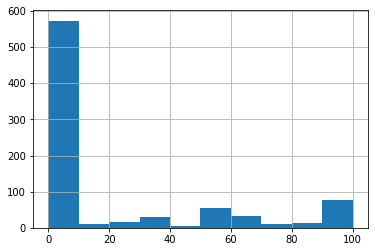

In [23]:
neg["max - min"].hist()

In [24]:
dfOvertime = dfOvertime.mask(dfOvertime.eq('None')).dropna()

In [25]:
dfOvertime.filter(regex="Predicted")

,2008 Predicted,2014 Predicted,2016 Predicted,2018 Predicted
0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds, tobacco, rice, and indigo, genetically modified food, cotton, wheat, tobacco, marijuana, fruits and vegetables, timber, coal and oil, Gossypium hirsutum, known as Upland Cotton or Mexican Cotton, is the most widely planted species of cotton, Soybeans, black locust, bald cypress and Southern magnolia","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds","Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds"
1,"MGM Mirage, MGM Mirage, Anthony Marnell III, Dubai World, Glenn Schaeffer, Las Vegas Sands came out on top and were awarded the rights to develop the land. The Resort is currently known as The Marina Bay Sands and is forecasted to open in 2009. This resort will be the first casino allowed in Singapore in the last 40 years.\nLastly, the las Vegas Sands has development plans for a resort on Hengqin Island, China, along with a gambling hall in Pennsylvania. Reports also indicate an interest in a new casino resort in Marlboro, MA. There is also speculation that LVS has bids for places in Europe and this shows the vast array of development sites that Las Vegas Sands has proposed.\nSands Macao Hotel.\nOn September 29, 2007, Las Vegas Sands Corp.'s Sheldon Adelson, Mandalay Resort Group, Las Vegas Sands, Steve Wynn, Mandalay Bay Resort and Casino",MGM Mirage,MGM Mirage,MGM Mirage
2,"The Elfstones of Shannara, The ""Heritage of Shannara, The ""Heritage of Shannara, The Original Shannara Trilogy, the Heritage of Shannara, Tolkien For Dummies, The Voyage of the Jerle Shannara, The Shannara family, Drenai Series, Genesis of Shannara Series",The Elfstones of Shannara,"The ""Heritage of Shannara",The Elfstones
3,"2001, 1896, 2005, 1958, 1951, 1988, finishing 2nd in 1994, 1989, 2000, 2007, 1951, 1952, 1955, 1957, 1965 and 1966",2001,2001,2000
4,"foreign, the public, households, pension funds, insurance companies and banks, pension funds, banks and mutual funds, stock holders, public, creditors who hold U.S. Debt Instruments, civil society groups, $25.2 trillion",the public,the public,the public
...,...,...,...,...
1198,"Poland, Moldova, Poland, Yugoslavia and Bulgaria, Moldova, Bessarabia, Moldova, Poland, Ukraine, Ukraine",Poland,Poland,Poland
1199,"interpeduncular ganglion, lamellipodium, ovarian fimbria, tunica albuginea, one companion cell, Schwann cells, companion cell, tubuli seminiferi recti, ischium, hemispheres",lamellipodium,lamellipodium,tunica albuginea
1200,"France, provinces, the central government, King and the upper classes, central government, federal government, federal, the King, central authority, federal Parliament",the central government,the central government,federal government
1201,"Maine, Llanilid, Canoga Park, Virginia, Priors Mesne in Aylburton, Gloucestershire, England, Passamaquoddy, Austin (including the University of Texas), Bastrop, and Smithville, Texas, Passamaquoddy lighthouse, The China Pavilion, Pinewood Shepperton studios",Llanilid,Llanilid,Llanilid


In [26]:
dfOvertime.sort_values("max - min").tail(100).sample(10)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,2016 Predicted,2016 Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min,timely,stdev
1190,1190,who does the voice of mrs. wolowitz on the big bang theory,['Carol Ann Susi'],Carol Ann Susi,"Julie McWhirter, Billie Hayes, Miss Hayes, Victoria Wicks, Estelle Harris, Angela Margaret Cartwright, Danielle Koenig, Zelda Rubinstein, Bill Mumy, Estelle","{'Julie McWhirter': 'Julie McWhirter', 'Billie Hayes': 'Billie Hayes', 'Miss Hayes': 'Billie Hayes', 'Victoria Wicks': 'Victoria Wicks', 'Estelle Harris': 'Estelle Harris', 'Angela Margaret Cartwright': 'Angela Cartwright', 'Danielle Koenig': 'Danielle Koenig', 'Zelda Rubinstein': 'Zelda Rubinstein', 'Bill Mumy': 'Angela Cartwright', 'Estelle': 'Estelle Harris'}",0.0,Carol Ann Susi,Carol Ann Susi,100.000000,Carol Ann Susi,Carol Ann Susi,100.0,Carol Ann Susi,Carol Ann Susi,100.0,False,57.735027
366,366,who had won the first grammy award for the best new artist,"['Chance the Rapper', 'Bobby Darin']",Grammy Award for Best New Artist,"Roberta Flack, LeAnn Rimes, Ross Bagdasarian Sr., Henry Mancini, Barry Manilow, 1986, 1987, Paul Simon, Best Classical Opera Production, Frank Sinatra","{'Roberta Flack': 'Grammy Award for Record of the Year', 'LeAnn Rimes': 'Grammy Award for Best New Artist', 'Ross Bagdasarian Sr.': 'Grammy Awards of 1959', 'Henry Mancini': 'Grammy Awards of 1961', 'Barry Manilow': 'American Music Award for Favorite Pop/Rock Male Artist', '1986': 'Grammy Award for Best New Classical Artist', '1987': 'Grammy Award for Best New Age Album', 'Paul Simon': 'Grammy Award for Album of the Year', 'Best Classical Opera Production': 'Grammy Award for Best Opera Recording', 'Frank Sinatra': 'Grammy Award for Album of the Year'}",100.0,LeAnn Rimes,Grammy Award for Best New Artist,0.000000,André Watts,Grammy Award for Best New Classical Artist,100.0,André Watts,Grammy Award for Best New Classical Artist,100.0,False,57.735027
263,263,who carried the us flag in the 2014 olympics,"['Todd Lodwick', 'Julie Chu']",List of flag bearers for the United States at the Olympics,"Danielle Goyette, Hannah Teter, Johnson, U.S. Navy corpsman, Greeley Wells, Chris Devlin-Young, Tom Burke, Joey Cheek, Romary, Klassen","{'Danielle Goyette': 'Cindy Klassen', 'Hannah Teter': 'United States at the 2006 Winter Olympics', 'Johnson': 'Raising the Flag on Iwo Jima', 'U.S. Navy corpsman': 'Raising the Flag on Iwo Jima', 'Greeley Wells': 'Raising the Flag on Iwo Jima', 'Chris Devlin-Young': 'United States at the 2006 Winter Paralympics', 'Tom Burke': 'United States at the Olympics', 'Joey Cheek': 'United States at the 2006 Winter Olympics', 'Romary': 'Janice Romary', 'Klassen': 'Cindy Klassen'}",50.0,Edward Burke,Edward Burke (track and field),100.000000,Edward Burke,Edward Burke (hammer thrower),0.0,Todd Lodwick,United States at the 2014 Winter Olympics,100.0,False,50.000000
1113,1113,fictional character whose favorite song was blueberry hill,['Richie Cunningham'],Blueberry Hill (song),"Richie Cunningham, Rocky Mountain Wonderboy, Denver, Deutschendorf, Polly Perkins, Johnny Mathis, Johnny, Johnny Mathis, Joseph Allan McCarthy, Hobo's Lullaby is a song written by Goebel Reeves, and famously performed by various people including folk singer Woody Guthrie","{'Richie Cunningham': 'Blueberry Hill (song)', 'Rocky Mountain Wonderboy': 'John Denver', 'Denver': 'John Denver', 'Deutschendorf': 'John Denver', 'Polly Perkins': 'Pretty Polly Perkins of Paddington Green', 'Johnny Mathis': 'Johnny Mathis', 'Johnny': 'Johnny Mathis', 'Joseph Allan McCarthy': 'Jack Segal', ""Hobo's Lullaby is a song written by Goebel Reeves, and famously performed by various people including folk singer Woody Guthrie"": ""Hobo's Lullaby""}",100.0,Polly Perkins,Pretty Polly Perkins of Paddington Green,5.000000,"Little is known of Thompson other than his works, mainly syrupy ballads used in blackface minstrel shows; 48 w

In [27]:
dfGT = pd.read_csv("dpr_unsol_OpenGT.csv")
dfGT['timely'] = dfGT['Question'].apply(lambda x: dependent[x])  
dfGT = dfGT.dropna()
dfGT = dfGT.mask(dfGT.eq('None')).dropna()

In [28]:
dfGT['stdev'] = dfGT.filter(regex="Bleu Score").std(axis = 1)

In [29]:
posGT = dfGT[dfGT["timely"]]
negGT = dfGT[dfGT["timely"] == False]

<AxesSubplot:>

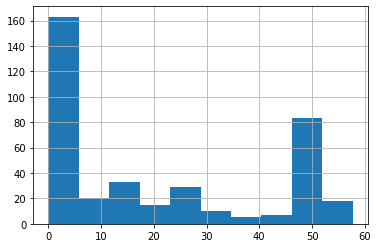

In [30]:
posGT["stdev"].hist()

<AxesSubplot:>

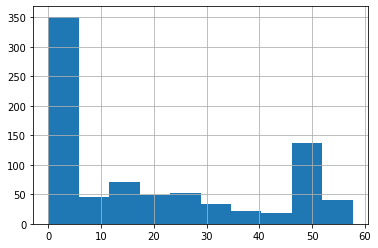

In [31]:
negGT["stdev"].hist()

<AxesSubplot:>

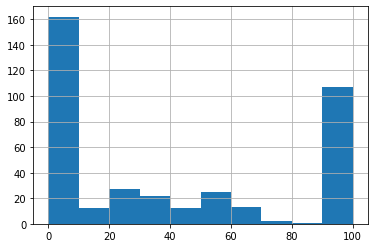

In [32]:
posGT["max - min"].hist()

<AxesSubplot:>

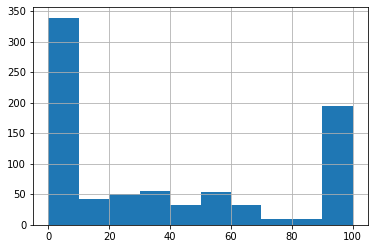

In [33]:
negGT["max - min"].hist()

In [34]:
cutoff = 30.00

truePos = len(posGT[posGT["stdev"] >= cutoff])
falseNeg = len(posGT[posGT["stdev"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negGT[negGT["stdev"] >= cutoff])
trueNeg = len(negGT[negGT["stdev"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

121 262
577 243
Recall:  0.31592689295039167
Precision: 0.3324175824175824
F1 Score: 0.32396251673360105


In [35]:
cutoff = 40.00

truePos = len(posGT[posGT["max - min"] >= cutoff])
falseNeg = len(posGT[posGT["max - min"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negGT[negGT["max - min"] >= cutoff])
trueNeg = len(negGT[negGT["max - min"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

160 223
488 332
Recall:  0.4177545691906005
Precision: 0.3252032520325203
F1 Score: 0.36571428571428566


In [36]:
# dfOvertime merge dfGT.filter(regex="Question|2018 Bleu Score")
dfOTGT = dfOvertime.merge(dfGT.filter(regex="Question|2018 Bleu Score"), how="outer", on="Question")
dfOTGT.rename(columns = {"2018 Bleu Score_y": "Accuracy"}, inplace = True)
dfOTGT

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,2016 Predicted,2016 Topic,2018 Bleu Score_x,2018 Predicted,2018 Topic,max - min,timely,stdev,Accuracy
0,0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds, tobacco, rice, and indigo, genetically modified food, cotton, wheat, tobacco, marijuana, fruits and vegetables, timber, coal and oil, Gossypium hirsutum, known as Upland Cotton or Mexican Cotton, is the most widely planted species of cotton, Soybeans, black locust, bald cypress and Southern magnolia","{'Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds': 'Agriculture in the United States', 'tobacco, rice, and indigo': 'Economic history of the United States', 'genetically modified food': 'United States', 'cotton, wheat, tobacco': 'Economic history of the United States', 'marijuana': 'United States', 'fruits and vegetables': 'Produce', 'timber, coal and oil': 'Economic history of the United States', 'Gossypium hirsutum, known as Upland Cotton or Mexican Cotton, is the most widely planted species of cotton': 'Gossypium hirsutum', 'Soybeans': 'Agriculture in the United States', 'black locust, bald cypress and Southern magnolia': 'Flora of the United States'}",100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.0,True,0.0,7.692308
1,1,who is the owner of the mandalay bay in vegas,['MGM Resorts International'],Mandalay Bay,"MGM Mirage, MGM Mirage, Anthony Marnell III, Dubai World, Glenn Schaeffer, Las Vegas Sands came out on top and were awarded the rights to develop the land. The Resort is currently known as The Marina Bay Sands and is forecasted to open in 2009. This resort will be the first casino allowed in Singapore in the last 40 years.\nLastly, the las Vegas Sands has development plans for a resort on Hengqin Island, China, along with a gambling hall in Pennsylvania. Reports also indicate an interest in a new casino resort in Marlboro, MA. There is also speculation that LVS has bids for places in Europe and this shows the vast array of development sites that Las Vegas Sands has proposed.\nSands Macao Hotel.\nOn September 29, 2007, Las Vegas Sands Corp.'s Sheldon Adelson, Mandalay Resort Group, Las Vegas Sands, Steve Wynn, Mandalay Bay Resort and Casino","{'MGM Mirage': 'Mandalay Bay Convention Center', 'Anthony Marnell III': 'MGM Mirage', 'Dubai World': 'MGM Mirage', 'Glenn Schaeffer': 'Fontainebleau Resorts', ""Las Vegas Sands came out on top and were awarded the rights to develop the land. The Resort is currently known as The Marina Bay Sands and is forecasted to open in 2009. This resort will be the first casino allowed in Singapore in the last 40 years.\nLastly, the las Vegas Sands has development plans for a resort on Hengqin Island, China, along with a gambling hall in Pennsylvania. Reports also indicate an interest in a new casino resort in Marlboro, MA. There is also speculation that LVS has bids for places in Europe and this shows the vast array of development sites that Las Vegas Sands has proposed.\nSands Macao Hotel.\nOn September 29, 2007, Las Vegas Sands Corp.'s Sheldon Adelson"": 'Las Vegas Sands', 'Mandalay Resort Group': 'Mandalay Resort Group', 'Las Vegas Sands': 'Las Vegas Sands', 'Steve Wynn': 'MGM Mirage', 'Mandalay Bay Resort and Casino': 'Mandalay Bay Events Center'}",100.0,MGM Mirage,Mandalay Bay,100.0,MGM Mirage,Mandalay Bay,100.0,MGM Mirage,Mandalay Bay,0.0,True,0.0,100.000000
2,2,what is the shannara chronicles season 2 based on,['The Sword of Shannara Trilogy'],The Shannara Chronicles,"The Elfstones of Shannara, The ""Heritage of Shannara, The

<AxesSubplot:>

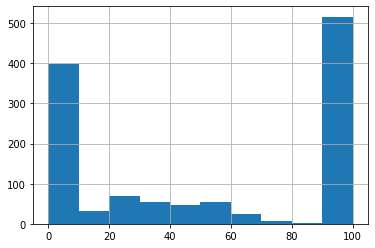

In [37]:
dfOTGT["Accuracy"].hist()

In [38]:
dfGT[dfGT["2018 Bleu Score"] >= 70.00].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
1,who is the owner of the mandalay bay in vegas,['MGM Resorts International'],Mandalay Bay,100.0,MGM Resorts International,Mandalay Bay
4,who owns the majority of the us debt,"['Japan and China', 'China', 'the public', 'Japan']",National debt of the United States,100.0,the public,National debt of the United States
6,who did the 49ers beat in the super bowls,['Cincinnati Bengals'],San Francisco 49ers,100.0,Cincinnati Bengals,Super Bowl XXIV
7,when was the south asian association for regional co-operation (saarc) formed,"['8 December 1985', 'December 1985']",South Asian Association for Regional Cooperation,100.0,8 December 1985,South Asian Association for Regional Cooperation
9,is jaffa cakes a biscuit or a cake,"['cakes', 'the Jaffa cake should be considered a cake for tax purposes', 'biscuit - sized cakes', 'Cake']",Jaffa Cakes,100.0,cake,Jaffa Cakes
...,...,...,...,...,...,...
1192,what is the meaning of shalom in english,"['peace', 'peace , harmony , wholeness , completeness , prosperity , welfare and tranquility and can be used idiomatically to mean both hello and goodbye']",Shalom,100.0,peace,Shalom
1194,who started ww2 and how did it start,"['Nazi Germany', 'begun on 1 September 1939 with the invasion of Poland by Nazi Germany', 'on 1 September 1939 with the invasion of Poland by Nazi Germany and subsequent declarations of war on Germany by France and the United Kingdom']",World War II,75.0,German invasion of Poland,World War II
1195,what is the setting of the book hoot,"['Florida and into the town of Coconut Cove', 'Florida']",Hoot (novel),100.0,Florida,Hoot (novel)
1197,who won the battle of the first battle of bull run,"['Confederate forces', 'Confederate victory', 'Confederate']",First Battle of Bull Run,100.0,Confederate,Battle of Bull's Gap


In [39]:
posfOT = dfOTGT.loc[(dfOTGT["Accuracy"] >= 60.00) & (dfOTGT["timely"])]
negfOT = dfOTGT.loc[(dfOTGT["Accuracy"] >= 60.00) & (dfOTGT["timely"] == False)]
#print(len(filtOT)/len(dfOTGT))

In [40]:
posfGT = dfGT.loc[(dfGT["2018 Bleu Score"] >= 60.00) & (dfOTGT["timely"])]
negfGT = dfGT.loc[(dfGT["2018 Bleu Score"] >= 60.00) & (dfOTGT["timely"] == False)]
#print(len(filtGT)/len(dfGT))

<AxesSubplot:>

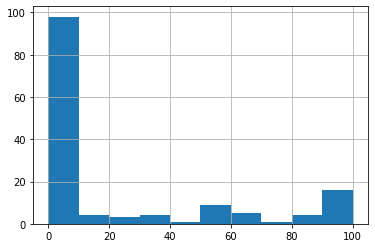

In [41]:
posfOT["max - min"].hist()

<AxesSubplot:>

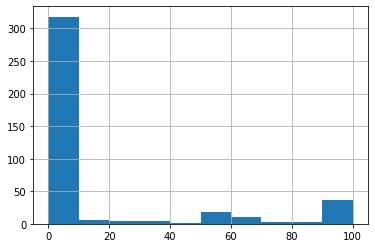

In [42]:
negfOT["max - min"].hist()

<AxesSubplot:>

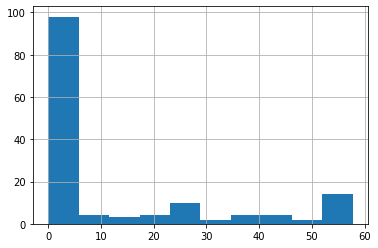

In [43]:
posfOT["stdev"].hist()

<AxesSubplot:>

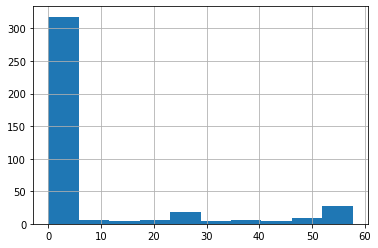

In [44]:
negfOT["stdev"].hist()

<AxesSubplot:>

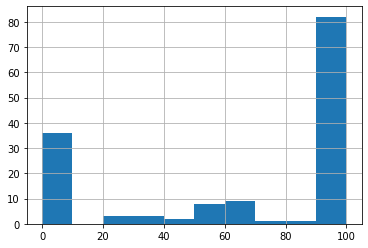

In [45]:
posfGT["max - min"].hist()

<AxesSubplot:>

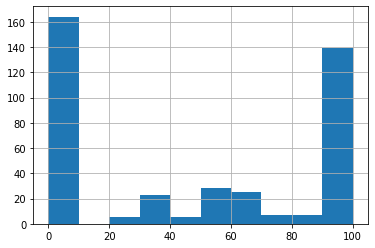

In [46]:
negfGT["max - min"].hist()

<AxesSubplot:>

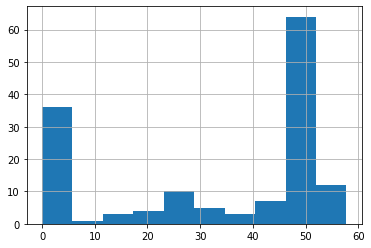

In [47]:
posfGT["stdev"].hist()

<AxesSubplot:>

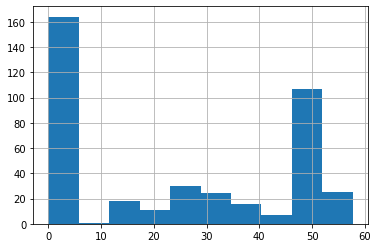

In [48]:
negfGT["stdev"].hist()

In [49]:
cutoff = 30.00

truePos = len(posfOT[posfOT["stdev"] >= cutoff])
falseNeg = len(posfOT[posfOT["stdev"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negfOT[negfOT["stdev"] >= cutoff])
trueNeg = len(negfOT[negfOT["stdev"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

26 119
352 51
Recall:  0.1793103448275862
Precision: 0.33766233766233766
F1 Score: 0.23423423423423423


In [50]:
cutoff = 80.00

truePos = len(posfOT[posfOT["max - min"] >= cutoff])
falseNeg = len(posfOT[posfOT["max - min"] < cutoff])
print(truePos, falseNeg)

falsePos = len(negfOT[negfOT["max - min"] >= cutoff])
trueNeg = len(negfOT[negfOT["max - min"] < cutoff])
print(trueNeg, falsePos)

recall = truePos / (truePos + falseNeg)
print("Recall: ", recall) # how many times is it correct when the q is actually timely

precision = truePos / (truePos + falsePos)
print("Precision:", precision) # how many times is it correct when it detects timeliness

f1s = (2 * (precision * recall))/ (precision + recall)
print("F1 Score:", f1s)

20 125
364 39
Recall:  0.13793103448275862
Precision: 0.3389830508474576
F1 Score: 0.19607843137254902


In [51]:
dfGT

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,2016 Bleu Score,2016 Predicted,2016 Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min,timely,stdev
0,0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,0.000000,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States,0.000000,"corn, soybeans and wheat",Issues in American commodity farming,0.000000,"fruits, vegetables, grains, and fiber crops",Agriculture in the United States,7.692308,Corn growth is dominated by west north central Iowa and east central Illinois,Corn production in the United States,7.692308,True,3.846154
1,1,who is the owner of the mandalay bay in vegas,['MGM Resorts International'],Mandalay Bay,30.326533,MGM Mirage,Mandalay Bay Convention Center,100.000000,MGM Resorts International,Mandalay Bay,100.000000,MGM Resorts International,Mandalay Bay,100.000000,MGM Resorts International,Mandalay Bay,69.673467,True,34.836734
2,2,what is the shannara chronicles season 2 based on,['The Sword of Shannara Trilogy'],The Shannara Chronicles,58.410059,The Elfstones of Shannara,Shannara,77.880078,The Sword of Shannara,The Sword of Shannara,58.410059,"The ""Heritage of Shannara",The Elf Queen of Shannara,58.410059,"The ""Heritage of Shannara",The Elf Queen of Shannara,19.470020,False,9.735010
3,3,when did michigan last win a national championship,['1989'],Michigan Wolverines men's basketball,100.000000,1989,Michigan Wolverines,0.000000,2013,Michigan Wolverines men's basketball,0.000000,1947,Michigan Wolverines,0.000000,1988–,List of Michigan Wolverines men's basketball seasons,100.000000,True,50.000000
4,4,who owns the majority of the us debt,"['Japan and China', 'China', 'the public', 'Japan']",National debt of the United States,100.000000,the public,United States public debt,100.000000,China,National debt of the United States,100.000000,the public,History of the United States public debt,100.000000,the public,National debt of the United States,0.000000,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1198,what country shares borders with both belarus and romania,['Ukraine'],State Border of Ukraine,100.000000,Ukraine,Geography of Moldova,100.000000,Ukraine,Estonia,0.000000,Poland,Belarus,0.000000,Poland,Belarus,100.000000,False,57.735027
1199,1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,0.000000,interpeduncular ganglion,Posterior perforated substance,6.896552,"sieve plates, pores in the plant cell walls that facilitate transport of materials between them. Each sieve tube element is normally associated with one or more nucleate companion cells",Sieve tube element,0.000000,lamellipodium,Lamellipodium,0.000000,tunica albuginea,Mediastinum testis,6.896552,False,3.448276
1200,1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,50.000000,the King,German Confederation,100.000000,the states,Articles of Confederation,50.000000,the Diet,Federal Treaty,100.000000,the states,Articles of Confederation,50.000000,False,28.867513
1201,1201,where was the new pete's dragon filmed,['New Zealand'],Pete's Dragon (2016 film),0.000000,Maine,Pete's Dragon,25.000000,"Chinatown, New York City",Revenge of the Green Dragons,100.000000,New Zealand,Pete's Dragon (2016 film),0.000000,Bhutan,Arrows of the Thunder Dragon,100.000000,True,47.324236


In [52]:
nqot = pd.read_csv("dpr_unsol_OpenOvertime.csv")
nqot = nqot.dropna()
nqot = nqot.mask(nqot.eq('None')).dropna()
nqot.sort_values("max - min").tail(100).sample(10)
nqot['timely'] = nqot['Question'].apply(lambda x: dependent[x])  
nqst = nqot.filter(regex="Question|GT|2018|202")

In [53]:
nqst

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States
1,who is the owner of the mandalay bay in vegas,['MGM Resorts International'],Mandalay Bay,100.0,MGM Mirage,Mandalay Bay
2,what is the shannara chronicles season 2 based on,['The Sword of Shannara Trilogy'],The Shannara Chronicles,100.0,The Elfstones,The Shannara Chronicles
3,when did michigan last win a national championship,['1989'],Michigan Wolverines men's basketball,100.0,2000,Michigan State Spartans men's basketball
4,who owns the majority of the us debt,"['Japan and China', 'China', 'the public', 'Japan']",National debt of the United States,100.0,the public,National debt of the United States
...,...,...,...,...,...,...
1198,what country shares borders with both belarus and romania,['Ukraine'],State Border of Ukraine,100.0,Poland,Belarus
1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,100.0,tunica albuginea,Mediastinum testis
1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,100.0,federal government,Canadian Confederation
1201,where was the new pete's dragon filmed,['New Zealand'],Pete's Dragon (2016 film),100.0,Llanilid,Dragon International Film Studios


In [56]:
nqst.groupby("2018 Bleu Score").size().sort_values().tail(25)

2018 Bleu Score
87.500000        1
42.857143        1
89.483932        1
37.500000        1
83.870968        1
7.531218         1
1.098901         1
4.166667         1
22.222222        1
6.060606         1
11.111111        1
28.571429        2
16.666667        2
83.333333        2
14.285714        2
75.000000        4
40.000000        4
25.000000        6
60.000000        7
20.000000        8
66.666667       26
33.333333       27
0.000000        41
50.000000       51
100.000000    1004
dtype: int64

In [57]:
nqst.loc[nqst["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
0,what are the main crops grown in the united states,['Corn'],Agriculture in the United States,100.0,"Corn, turkeys, tomatoes, potatoes, peanuts, and sunflower seeds",Agriculture in the United States
1,who is the owner of the mandalay bay in vegas,['MGM Resorts International'],Mandalay Bay,100.0,MGM Mirage,Mandalay Bay
2,what is the shannara chronicles season 2 based on,['The Sword of Shannara Trilogy'],The Shannara Chronicles,100.0,The Elfstones,The Shannara Chronicles
3,when did michigan last win a national championship,['1989'],Michigan Wolverines men's basketball,100.0,2000,Michigan State Spartans men's basketball
4,who owns the majority of the us debt,"['Japan and China', 'China', 'the public', 'Japan']",National debt of the United States,100.0,the public,National debt of the United States
...,...,...,...,...,...,...
1198,what country shares borders with both belarus and romania,['Ukraine'],State Border of Ukraine,100.0,Poland,Belarus
1199,name the cell which is attached to the lateral side of sieve tube,['sieve tube elements'],Sieve tube element,100.0,tunica albuginea,Mediastinum testis
1200,which government had more power under the articles of confederation,"['the states', 'states']",Articles of Confederation,100.0,federal government,Canadian Confederation
1201,where was the new pete's dragon filmed,['New Zealand'],Pete's Dragon (2016 film),100.0,Llanilid,Dragon International Film Studios


In [58]:
nqot.loc[2643]

KeyError: 2643

In [15]:
nqot = pd.read_csv("OpenGT.csv")
nqot = nqot.dropna()
nqot = nqot.mask(nqot.eq('None')).dropna()
nqot.sort_values("max - min").head(100).sample(10)
nqot["max bleu"] = nqot[["2018 Bleu Score", "2020 Bleu Score", "2021 Bleu Score"]].max(axis=1)
nqot.loc[nqot["2018 Bleu Score"] == 0.0]
nqot['timely'] = nqot['Question'].apply(lambda x: dependent[x])  
nqot.filter(regex="Question|GT|Bleu Score|max").sort_values("max bleu").tail(25)

,Question,GT Answer,GT Topic,2008 Bleu Score,2014 Bleu Score,2016 Bleu Score,2018 Bleu Score,2020 Bleu Score,2021 Bleu Score,max - min,max bleu
158,who was the author of the art of war,"[""the ancient Chinese military strategist Sun Tzu ( `` Master Sun '' , also spelled Sunzi )"", 'attributed to the ancient Chinese military strategist Sun Tzu', 'Sun Tzu']",The Art of War,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
673,what new deal program limited production in industry,"['NIRA', 'National Industrial Recovery Act']",New Deal,50.000000,100.000000,50.000000,50.000000,100.000000,50.000000,50.000000,100.0
168,when was the miraculous journey of edward tulane published,"['March 30 , 2006', '2006']",The Miraculous Journey of Edward Tulane,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
668,the group that officially elects the president of the united states is called,"['the U.S. Electoral College', 'U.S. Electoral College']",United States presidential election,60.653066,60.653066,100.000000,100.000000,60.653066,60.653066,39.346934,100.0
667,who was the winner of the first indianapolis 500,['Ray Harroun'],List of Indianapolis 500 winners,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
682,when did the us stop trading with japan,"['1940', '1939']",Events leading to the attack on Pearl Harbor,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,100.0
664,who is the guy who walked across the twin towers,['Philippe Petit'],Philippe Petit,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
710,what was the name of the plant on little shop of horrors,['Audrey II'],Little Shop of Horrors (film),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0
387,when did they stop making the nissan xterra,"['2015', 'after the 2015 model year']",Nissan Xterra,0.000000,0.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.0
756,who is the present rajya sabha speaker of india,['Venkaiah Naidu'],Rajya Sabha,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [16]:
nqot.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
23.076923       1
67.032005       1
58.410059       1
52.438111       1
40.000000       1
37.500000       1
34.227808       1
23.337955       1
92.596108       1
88.888889       1
22.222222       1
15.922918       1
14.893617       1
14.285714       1
92.004441       1
4.166667        1
11.156508       1
10.000000       1
0.819672        1
7.692308        1
6.000000        1
2.127660        1
4.347826        1
2.247191        1
4.000000        1
4.109589        1
75.000000       2
71.653131       2
51.341712       2
12.500000       2
28.571429       2
5.555556        2
18.393972       2
16.666667       2
22.313016       2
25.000000       3
23.884377       3
60.653066       3
20.000000       3
13.533528       3
47.768754       6
66.666667       7
33.333333       9
36.787944      12
50.000000      18
0.000000      173
100.000000    219
dtype: int64

In [17]:
accurate = nqot.loc[nqot["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018")
len(accurate.loc[accurate["GT Topic"] == accurate["2018 Topic"]]) / len(accurate)

1.0

In [18]:
inaccurate = nqot.loc[nqot["2018 Bleu Score"] == 0.0].filter(regex="Question|GT|2018")
len(inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]]) / len(inaccurate)

1.0

In [19]:
len(inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]]) / len(nqot)

0.34393638170974156

In [20]:
inaccurate.loc[inaccurate["GT Topic"] == inaccurate["2018 Topic"]].sample(25)

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
921,who is the leading african producer of wool,"['Sudan', 'South Africa']",Wool,0.0,Australia,Wool
794,who are the australia's got talent judges,['Kelly Osbourne'],Australia's Got Talent,0.0,"Minogue, Burlinson and Symons",Australia's Got Talent
54,this inventor co-created the film fred ott’s sneeze,"['Fred Ott', 'Edison']",Fred Ott's Sneeze,0.0,William K.L. Dickson,Fred Ott's Sneeze
509,who had the longest tenure as moderator on meet the press,['Tim Russert'],Meet the Press,0.0,Chuck Todd,Meet the Press
134,who are the judges on the fisa court,['Dennis Saylor'],United States Foreign Intelligence Surveillance Court,0.0,four of the five,United States Foreign Intelligence Surveillance Court
951,who plays timon in lion king on broadway,['Max Casella'],The Lion King (musical),0.0,Simon Gregor,The Lion King (musical)
179,when does boomer find out she a cylon,"[""In the episode `` Kobol 's Last Gleaming ''"", ""Kobol 's Last Gleaming"", ""`` Kobol 's Last Gleaming ''""]",Number Eight (Battlestar Galactica),0.0,She has accepted herself as a Cylon and is fully integrated back into their society,Number Eight (Battlestar Galactica)
75,who does bryce dallas howard play in the grinch,['Surprised Who'],Bryce Dallas Howard,0.0,Rosalind,Bryce Dallas Howard
705,who played susanna in legends of the fall,['Julia Ormond'],Legends of the Fall,0.0,Aidan Quinn,Legends of the Fall
451,how long has tom brady been playing professional football,['18 - season career'],Tom Brady,0.0,15th,Tom Brady


<AxesSubplot:>

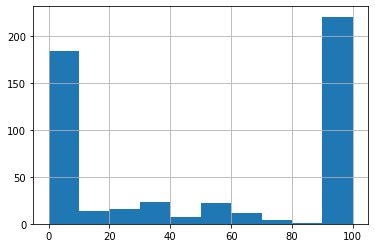

In [21]:
nqot.loc[nqot["GT Topic"] == nqot["2018 Topic"]]["2018 Bleu Score"].hist()

<AxesSubplot:>

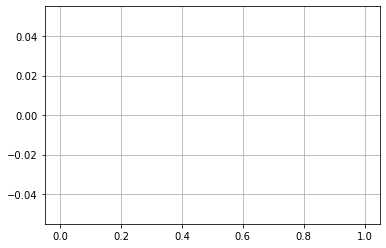

In [22]:
nqot.loc[nqot["GT Topic"] != nqot["2018 Topic"]]["2018 Bleu Score"].hist()

In [26]:
ost = pd.read_csv("OpenGT.csv")
ost = ost.dropna()
ost = ost.mask(ost.eq('None')).dropna()
ost.sort_values("max - min").head(100).sample(10)
#nqot["max bleu"] = nqot[["2018 Bleu Score", "2020 Bleu Score", "2021 Bleu Score"]].max(axis=1)
#nqot.loc[nqot["2018 Bleu Score"] == 0.0]
# nqot.filter(regex="Question|GT|Bleu Score|max").sort_values("max bleu").tail(25)

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
461,461,what are some special products made in mississippi,['farm - raised catfish'],Mississippi,0.0,"gospel music, country music, jazz, blues, and rock and roll",Mississippi,0.0,grocers,Mississippi,...,0.0,grocers,Mississippi,0.0,music and literature,Mississippi,0.0,music and literature,Mississippi,0.0
463,463,who sings gimme shelter with mick jagger,['Merry Clayton'],Merry Clayton,100.0,Merry Clayton,Merry Clayton,100.0,Merry Clayton,Merry Clayton,...,100.0,Merry Clayton,Merry Clayton,100.0,Merry Clayton,Merry Clayton,100.0,Merry Clayton,Merry Clayton,0.0
854,854,how many gold medals did australia win in the 2000 olympics,['16'],Australia at the 2000 Summer Olympics,0.0,5,Australia at the 2000 Summer Olympics,0.0,5,Australia at the 2000 Summer Olympics,...,0.0,"5 Gold, 9 Silver, and 4 Bronze medals",Australia at the 2000 Summer Olympics,0.0,2,Australia at the 2000 Summer Olympics,0.0,5,Australia at the 2000 Summer Olympics,0.0
431,431,the boiling point of water is 100 degrees celsius express this in si units,['100 ° C'],Celsius,0.0,hotter,Celsius,0.0,freezing point of water,Celsius,...,0.0,freezing point of water,Celsius,0.0,hotter,Celsius,0.0,freezing point of water,Celsius,0.0
360,360,who came out first batman or spider man,"['Superman', 'Batman']",First appearance,100.0,Superman,First appearance,100.0,Superman,First appearance,...,100.0,Batman,First appearance,100.0,Superman,First appearance,100.0,Superman,First appearance,0.0
388,388,who sang original i want a hippopotamus for christmas,['Gayla Peevey'],I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,...,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,100.0,Gayla Peevey,I Want a Hippopotamus for Christmas,0.0
591,591,what is the main religion in british columbia,"['Protestant', 'Catholic']",Demographics of British Columbia,0.0,"4,254,500\nPercentage of National Population: 13.2%\nPopulation Growth Rate: 4.9%\nSee Also: Demographics of Canada\nVital Statistics.",Demographics of British Columbia,0.0,British Columbia has a very diverse,Demographics of British Columbia,...,0.0,British Columbia has a very diverse,Demographics of British Columbia,0.0,Hinduism,Demographics of British Columbia,0.0,Sikhism,Demographics of British Columbia,0.0
277,277,who is the secretary of state for northern ireland,['Karen Bradley'],Secretary of State for Northern Ireland,0.0,the United Kingdom cabinet minister,Secretary of State for Northern Ireland,0.0,Her Majesty's Principal Secretary of State,Secretary of State for Northern Ireland,...,0.0,Her Majesty's Principal Secretary of State,Secretary of State for Northern Ireland,0.0,the principal secretary of state in Her Majesty's Government who represents Northern Ireland in Cabinet,Secretary of State for Northern Ireland,0.0,a secretary of state in the Government of the United Kingdom,Secretary of State for Northern Ireland,0.0
311,311,who won the gold for the men's figure skating,['Yuzuru Hanyu'],List of Olympic medalists in figure skating,0.0,2006.,List of Olympic medalists in figure skating,0.0,Russian figure skaters,List of Olympic medalists in figure skating,...,0.0,Nikolai Panin,List of Olympic medalists in figure skating,0.0,Evgeni Plushenko,List of Olympic medalists in figure skating,0.0,Gillis Grafström,List of Olympic medalists in figure skating,0.0
831,831,when is the last time wisconsin missed the ncaa tournament,['1997 -- 98'],Wisconsin Badgers men's basketball,0.0,January 31,Wisconsin Badgers men's basketball,0.0,1947,Wisconsin Badgers men's basketball,...,0.0,1959–1994,Wisconsin Badgers men's basketball,0.0,1998,Wi

In [27]:
ost.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
23.076923       1
67.032005       1
58.410059       1
52.438111       1
40.000000       1
37.500000       1
34.227808       1
23.337955       1
92.596108       1
88.888889       1
22.222222       1
15.922918       1
14.893617       1
14.285714       1
92.004441       1
4.166667        1
11.156508       1
10.000000       1
0.819672        1
7.692308        1
6.000000        1
2.127660        1
4.347826        1
2.247191        1
4.000000        1
4.109589        1
75.000000       2
71.653131       2
51.341712       2
12.500000       2
28.571429       2
5.555556        2
18.393972       2
16.666667       2
22.313016       2
25.000000       3
23.884377       3
60.653066       3
20.000000       3
13.533528       3
47.768754       6
66.666667       7
33.333333       9
36.787944      12
50.000000      18
0.000000      173
100.000000    219
dtype: int64

<AxesSubplot:>

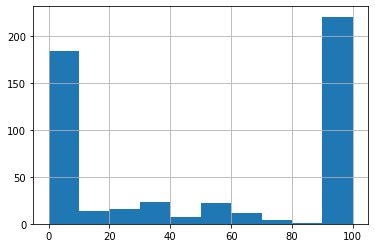

In [28]:
ost.loc[ost["GT Topic"] == ost["2018 Topic"]]["2018 Bleu Score"].hist()

In [29]:
len(ost.loc[ost["GT Topic"] == ost["2018 Topic"]].loc[ost["2018 Bleu Score"] >= 50.0]) / len(ost.loc[ost["GT Topic"] == ost["2018 Topic"]])

0.5149105367793241

<AxesSubplot:>

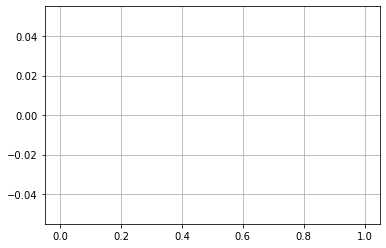

In [30]:
ost.loc[ost["GT Topic"] != ost["2018 Topic"]]["2018 Bleu Score"].hist()

In [31]:
len(ost.loc[ost["GT Topic"] != ost["2018 Topic"]].loc[ost["2018 Bleu Score"] == 100.0]) / len(ost.loc[ost["GT Topic"] != ost["2018 Topic"]])

ZeroDivisionError: division by zero

In [32]:
ost.loc[ost["GT Topic"] != ost["2018 Topic"]].loc[ost["2018 Bleu Score"] == 100.0].filter(regex="Question|GT|2018|max")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min


In [33]:
ost.loc[ost["GT Topic"] == ost["2018 Topic"]].loc[ost["2018 Bleu Score"] >= 50.0].filter(regex="Question|GT|2018|max").sort_values("2018 Bleu Score")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic,max - min
318,who has won the most world series in baseball,"['the New York Yankees', 'New York Yankees']",World Series,50.0,New York Yankees and the St. Louis Cardinals,World Series,100.000000
825,where does cerebrospinal fluid flow to when it exits the cerebral aqueduct,"['the fourth ventricle', 'fourth ventricle']",Ventricular system,50.0,third ventricle,Ventricular system,87.500000
165,who ruled the ottoman empire in the 1500s,"['a line of committed and effective Sultans', 'Selim I']",Ottoman Empire,50.0,Osman I,Ottoman Empire,66.666667
162,what was vietnam called in the years before world war 2,"['French Indochina , consisting of Cochinchina ( southern Vietnam ) , Annam ( central Vietnam ) , Tonkin ( northern Vietnam )', 'French Indochina']",History of Vietnam,50.0,Democratic Republic of Vietnam,History of Vietnam,13.212056
540,who won the mvp for the national league,"['Giancarlo Stanton', 'Stanton , Giancarlo']",Major League Baseball Most Valuable Player Award,50.0,carlo Stanton,Major League Baseball Most Valuable Player Award,50.000000
...,...,...,...,...,...,...,...
489,who wrote the book the origin of species,['Charles Darwin'],On the Origin of Species,100.0,Charles Darwin,On the Origin of Species,0.000000
495,who starred in the movie summer of 42,"[""Jennifer O'Neill"", 'Gary Grimes']",Summer of '42,100.0,Gary Grimes,Summer of '42,60.000000
498,who has the most podium finishes in australia,['Michael Schumacher'],List of Formula One driver records,100.0,Michael Schumacher,List of Formula One driver records,100.000000
445,who has the most olympic medals in figure skating,"['Tessa Virtue', 'Canadian ice dancers Tessa Virtue and Scott Moir']",List of Olympic medalists in figure skating,100.0,Tessa Virtue and Scott Moir,List of Olympic medalists in figure skating,100.000000


In [34]:
est = pd.read_csv("ElasticGT.csv")
est = est.dropna()
est = est.mask(est.eq('None')).dropna()
est.sort_values("max - min")

,Unnamed: 0,Question,GT Answer,GT Topic,2008 Bleu Score,2008 Predicted,2008 Topic,2014 Bleu Score,2014 Predicted,2014 Topic,...,2018 Bleu Score,2018 Predicted,2018 Topic,2020 Bleu Score,2020 Predicted,2020 Topic,2021 Bleu Score,2021 Predicted,2021 Topic,max - min
2179,2179,what type of business is chamber of commerce,"['a form of business network', 'a form of business network , for example , a local organization of businesses whose goal is to further the interests of businesses']",Chamber of commerce,100.000000,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,...,100.0,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,100.0,a form of business network,Chamber of commerce,0.0
1774,1774,which country is the last member of saarc,['Afghanistan'],South Asian Association for Regional Cooperation,0.000000,Sri Lankan,South Asian Association for Regional Cooperation,0.0,Nepal,South Asian Association for Regional Cooperation,...,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0,Bangladesh,South Asian Association for Regional Cooperation,0.0
3449,3449,who were farmers who kept a small portion of their crops & gave the rest to the landowners,['Sharecropping'],Sharecropping,0.000000,"Sharecrop farmers were loaned a plot of land to work, and in exchange owed the owner a share of the crop at the end of the season. Often the planter’s share was 1/3, though sometime it was much higher. The sharecropper was required to purchase seed, tools and fertilizer, as well as food and clothing, on credit at the plantation store. When the harvest came, the sharecrop farmer",Sharecropping,0.0,Sharecroppers,Sharecropping,...,0.0,tenant farmers,Sharecropping,0.0,tenant farmers,Sharecropping,0.0,tenant farmers,Sharecropping,0.0
1768,1768,natural resources can be divided into what two categories,['Biotic'],Natural resource,0.000000,renewable and non-renewable resources,Natural resource,0.0,renewable or non-renewable,Natural resource,...,0.0,needs of future generations,Natural resource,0.0,"land, water, fisheries and pastoral rights",Natural resource,0.0,different ways,Natural resource,0.0
3444,3444,how many lines of symmetry are there in a equilateral triangle,"['3', '3 lines of reflection and rotational symmetry']",Equilateral triangle,100.000000,3,Equilateral triangle,100.0,3,Equilateral triangle,...,100.0,3,Equilateral triangle,100.0,3,Equilateral triangle,100.0,3,Equilateral triangle,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,3197,a country having an island location and a country having continental location,['Australia'],List of island countries,0.000000,Micronesia,List of island countries,100.0,Australia,List of island countries,...,2.5,"Australia is designated as a continent, it is often referred to as an island, as it has no land borders. Some declared island countries are not universally recognized as politically independent, such as Northern Cyprus. Some states, such as Taiwan",List of island countries,100.0,Australia,List of island countries,100.0,Australia,List of island countries,100.0
3204,3204,what grade was arnold from hey arnold in,['fourth'],Hey Arnold!,0.000000,4th,Hey Arnold!,100.0,fourth,Hey Arnold!,...,100.0,fourth,Hey Arnold!,100.0,fourth,Hey Arnold!,100.0,fourth,Hey Arnold!,100.0
1245,1245,who plays jack skellington in nightmare before christmas,['Chris Sarandon'],Jack Skellington,0.000000,Sally,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,...,100.0,Chris Sarandon,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,100.0,Chris Sarandon,Jack Skellington,100.0
3180,3180,why was the plague that struck athens so devastating,['close quarters and poor hygiene'],Plague of Athens,42.857143,poor hygiene habits and public sanitation conditions,Plague of Athens,0.0,no one could recall anywhere its like,P

In [35]:
len(est.loc[est["GT Topic"] == est["2018 Topic"]])

2150

In [36]:
est.groupby("2018 Bleu Score").size().sort_values()

2018 Bleu Score
15.922918       1
18.750000       1
18.887560       1
19.470020       1
19.983114       1
             ... 
36.787944      32
33.333333      37
50.000000      65
0.000000      590
100.000000    804
Length: 297, dtype: int64

<AxesSubplot:>

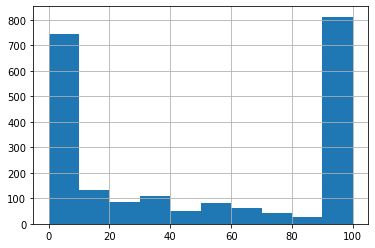

In [37]:
est.loc[est["GT Topic"] == est["2018 Topic"]]["2018 Bleu Score"].hist()

In [38]:
est.loc[est["2018 Bleu Score"] >= 50.0].filter(regex="Question|GT|2018")

,Question,GT Answer,GT Topic,2018 Bleu Score,2018 Predicted,2018 Topic
6,where was the world economic forum held this year,"['Davos , a mountain resort in Graubünden , in the eastern Alps region of Switzerland', 'Davos']",World Economic Forum,100.000000,Davos,World Economic Forum
18,where did the race in grease take place,"['the Los Angeles River , between the First and Seventh Street Bridges', 'at the Los Angeles River , between the First and Seventh Street Bridges', 'Thunder Road']",Grease (film),100.000000,Los Angeles River,Grease (film)
21,a good that can be used in place of another good,"['A substitute good', 'substitute good']",Substitute good,100.000000,substitute good,Substitute good
31,how old was sasuke when his clan died,['seven'],Sasuke Uchiha,100.000000,seven,Sasuke Uchiha
34,who is the pastor of new birth missionary baptist church now,"['Stephen A. Davis', 'Stephen A. Davis , pastor of New Birth Birmingham in Birmingham , Alabama']",New Birth Missionary Baptist Church,100.000000,Stephen A. Davis,New Birth Missionary Baptist Church
...,...,...,...,...,...,...
4230,how long is one full rotation of the earth,"['about 24 hours with respect to the Sun , but once every 23 hours , 56 minutes , and 4 seconds with respect to the stars', 'about 24 hours']",Earth's rotation,80.000000,once in about 24 hours,Earth's rotation
4247,what is the meaning of molech in the bible,"['biblical name of a Canaanite god associated with child sacrifice', 'king', 'a Canaanite god associated with child sacrifice', 'the biblical name of a Canaanite god associated with child sacrifice']",Moloch,67.032005,the name of a god,Moloch
4249,who wrote the song fly me to the moon,['Bart Howard'],Fly Me to the Moon,100.000000,Bart Howard,Fly Me to the Moon
4278,when was the first driver's license required,"['1888', '1 January 1904 after the Motor Car Act 1903 received royal assent in the United Kingdom', '1 January 1904']",Driver's license,100.000000,1 January 1904,Driver's license


In [39]:
1026/len(est)

0.4772093023255814